# Principal Component Analysis

PCA is a dimensionality reduction technique widely used in data analysis. It helps to simplify and reduce the number of dimensions required to understand a dataset when there are many numerical variables, into a smaller number of “Principal Components”.

It can be useful to help us understand our data, since thinking in more than three dimensions can be problematic.
With PCA, we can extract most of the information into only one or two variables constructed in a very specific way, such that they capture the most variance while having the added benefit of being uncorrelated among them by construction.

The main purposes of principal component analysis is to:
(a) identify hidden patterns in a dataset,
(b) reduce the dimensionnality of the data by removing the noise and redundancy in the data,
(c) identify correlated variables


## Important!

Before you can use this this R code, load the **data_brexit_referendum_adjusted.csv** file from Blackboard. Read through "brexit example.R" for full details on how this file was generated.

In [2]:
data_file <- read.csv("data_brexit_referendum_adjusted.csv")

Principal Component Analysis (PCA) wrks best with numerical data so I'm checking that all data is now numeric first.

In [3]:
data_numeric_variables <- sapply(data_file, is.numeric)
# Print gives us a slightly better structure of output
print(data_numeric_variables)

                   X                   ID           RegionName 
                TRUE                 TRUE                FALSE 
              NVotes                Leave            Residents 
                TRUE                 TRUE                 TRUE 
          Households         AdultMeanAge                White 
                TRUE                 TRUE                 TRUE 
               Owned        OwnedOutright           SocialRent 
                TRUE                 TRUE                 TRUE 
         PrivateRent             Students                Unemp 
                TRUE                 TRUE                 TRUE 
        UnempRate_EA          HigherOccup              Density 
                TRUE                 TRUE                 TRUE 
            Deprived          MultiDepriv           Proportion 
                TRUE                 TRUE                 TRUE 
                Vote           Age_18to44         Age_45_above 
               FALSE                 TRU

In the earlier lecture I created a **Proportion** variable using the variables **NVotes** and **Leave**. Both these variables are correlated with **Proportion** and will produce false relationships in PCA. Now I'll remove these from the list of variables that I'm going to use for PCA.


In [4]:
data_numeric_variables["NVotes"] <- FALSE
data_numeric_variables["Leave"] <- FALSE

Now I'll remove all non-numeric data and the other 2 variables.

In [5]:
data_file_adjusted <- data_file[, data_numeric_variables]

Passing this numeric data (23 variables) into the `prcomp()` function and setting two arguments, center and scale, to be TRUE. Then we can have a peek at the PCA object with the `summary()` function.

When we print the `pca` object, we can see the standard deviations for each variable, but more importantly, we can see the weights used for each variable to create each principal component. 

As we can see, when we look at the full output in our computer, among the most important weights (the largest absolute values) we have the **age** and **ethnicity** variables, as well as others, such as **home ownership**.

In [6]:
pca <- prcomp(data_file_adjusted, center = TRUE, scale. = TRUE)
pca

Standard deviations (1, .., p=23):
 [1] 3.043219e+00 2.428564e+00 1.433885e+00 1.295641e+00 1.145004e+00
 [6] 9.655583e-01 7.208175e-01 6.210257e-01 5.555435e-01 4.592016e-01
[11] 3.813017e-01 3.431258e-01 2.121864e-01 1.986457e-01 1.627968e-01
[16] 1.368723e-01 1.147383e-01 1.019804e-01 9.696109e-02 8.110279e-02
[21] 7.055998e-02 2.700286e-02 1.750784e-16

Rotation (n x k) = (23 x 23):
                              PC1          PC2          PC3          PC4
X                     0.008235001  0.008271937  0.664743650 -0.212267938
ID                    0.008235001  0.008271937  0.664743650 -0.212267938
Residents             0.193079164 -0.013686224  0.199496316  0.399426986
Households            0.172076168 -0.016303942  0.182956698  0.304773992
AdultMeanAge         -0.272635613 -0.182191801  0.023100560  0.103790101
White                -0.226444295 -0.100950791 -0.044684872 -0.385552477
Owned                -0.287968997 -0.076234500  0.096149903  0.251957178
OwnedOutright        -0.26

Lets have a look at the summary of the pca components.

In [7]:
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     3.0432 2.4286 1.43389 1.29564 1.1450 0.96556 0.72082
Proportion of Variance 0.4027 0.2564 0.08939 0.07299 0.0570 0.04053 0.02259
Cumulative Proportion  0.4027 0.6591 0.74848 0.82147 0.8785 0.91901 0.94160
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.62103 0.55554 0.45920 0.38130 0.34313 0.21219 0.19865
Proportion of Variance 0.01677 0.01342 0.00917 0.00632 0.00512 0.00196 0.00172
Cumulative Proportion  0.95837 0.97178 0.98095 0.98727 0.99239 0.99435 0.99607
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.16280 0.13687 0.11474 0.10198 0.09696 0.08110 0.07056
Proportion of Variance 0.00115 0.00081 0.00057 0.00045 0.00041 0.00029 0.00022
Cumulative Proportion  0.99722 0.99803 0.99860 0.99906 0.99947 0.99975 0.99997
                          PC22      PC

We obtain 23 principal components, which are called PC1-23. Each of these explains a percentage of the total variation in the dataset. That is to say: **PC1** explains **44%** of the total variance, which means that nearly half of the information in the dataset (23 variables) can be encapsulated by just that one Principal Component. 

**PC2** explains **22%** of the variance. So, by knowing the position of a sample in relation to just PC1 and PC2, you can get a very accurate view on where it stands in relation to other samples, as just PC1 and PC2 can explain 66% of the variance.

The **Cumulative Proportion** value shows how each subsequent principal component adds to the amount of total variance captured by eac pca. For example, the cumulative proportion of 0.75232 for PC3 means that up to 0.75232% of the dat can be explained by just these 3 PCs.

We can look at the "cumulative proportion" line to see this value across all variables eg PC1-3 = 75% of data.

The rotation measure provides the principal component loading. Each column of rotation matrix contains the principal component loading vector. This is the most important measure we should be interested in and is the exact measure of a variable in a component.

In this example I'm showing all vector and the first 4 principal components.

In [8]:
pca$rotation[1:nrow(pca$rotation), 1:4]

,PC1,PC2,PC3,PC4
X,0.008235001,0.008271937,0.664743650,-0.212267938
ID,0.008235001,0.008271937,0.664743650,-0.212267938
Residents,0.193079164,-0.013686224,0.199496316,0.399426986
Households,0.172076168,-0.016303942,0.182956698,0.304773992
AdultMeanAge,-0.272635613,-0.182191801,0.023100560,0.103790101
White,-0.226444295,-0.100950791,-0.044684872,-0.385552477
Owned,-0.287968997,-0.076234500,0.096149903,0.251957178
OwnedOutright,-0.265431971,-0.046400632,0.093474306,0.301828280
SocialRent,0.225030077,-0.107493564,-0.122514450,-0.300687491
PrivateRent,0.196480763,0.257189783,-0.009905040,-0.057139251


It appears that Unemp, UnempRate_EA, Deprived, Age_18to44 infer the first principal component.

And PrivateRent, HigherOccup, MultiDepriv, Age_18to44, High_education_level infer the second principal component.



## Eigenvalues and Variances

Eigenvalues measure the amount of variation retained by each principal component. 
Eigenvalues are large for the first PCs and small for the subsequent PCs. 
That is, the first PCs corresponds to the directions with the maximum amount of variation in the data set.

We examine the eigenvalues to determine the number of principal components to be considered. The eigenvalues and the proportion of variances (i.e., information) retained by the principal components (PCs) can be extracted using the function `get_eigenvalue()` from the `factoextra` package.

In [9]:
library("factoextra")
eig_values <- get_eigenvalue(pca)
eig_values

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,9.261184e+00,4.026602e+01,40.26602
Dim.2,5.897923e+00,2.564314e+01,65.90916
Dim.3,2.056027e+00,8.939249e+00,74.84841
Dim.4,1.678686e+00,7.298635e+00,82.14704
Dim.5,1.311034e+00,5.700147e+00,87.84719
Dim.6,9.323028e-01,4.053491e+00,91.90068
Dim.7,5.195778e-01,2.259034e+00,94.15971
Dim.8,3.856729e-01,1.676839e+00,95.83655
Dim.9,3.086286e-01,1.341863e+00,97.17842


Eigenvalues can be used to determine the number of principal components to retain after PCA (Kaiser 1961): 

**For futher information, refer to Kaiser, Henry F. 1961. “A Note on Guttman’s Lower Bound for the Number of Common Factors.” British Journal of Statistical Psychology 14: 1–2.**


#Unfortunately, there is no well-accepted objective way to decide how many principal components are enough. 
This will depend on the specific field of application and the specific data set. In practice, we tend to look at the first few principal components in order to find interesting patterns in the data.

In our analysis, the first three principal components explain 74% of the variation. This is an acceptably large percentage.

## Plotting Principal Components and their variables

An alternative method to determine the number of principal components is to look at a Scree Plot, which is the plot of eigenvalues ordered from largest to the smallest. The number of components is determined at the point, beyond which the remaining eigenvalues are all relatively small and of comparable size.

**See Jollife, I.T. 2002. Principal Component Analysis. 2nd ed. New York: Springer-Verlag. https://goo.gl/SB86SR.**

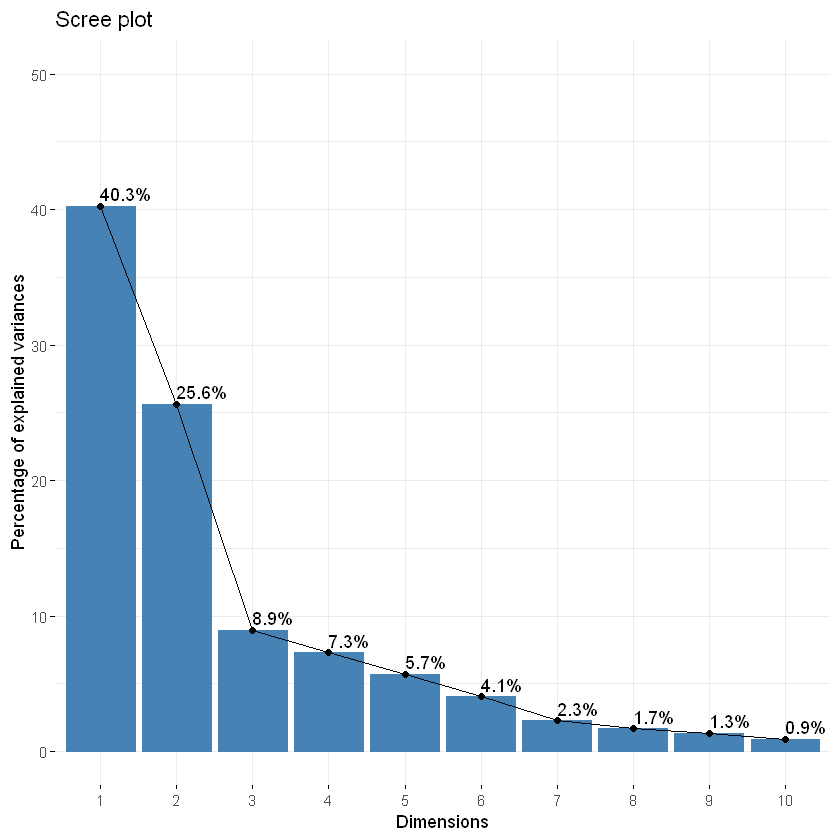

In [10]:
fviz_eig(pca, addlabels = TRUE, ylim = c(0, 50))

From the plot, we might want to stop at the fifth principal component. 
87% of the information (variances) contained in the data are retained by the first five principal components.

A simple method to extract the results, for variables, from a PCA output is to use the function `get_pca_var()` from the `factoextra` package. 
This function provides a list of matrices containing all the results for the active variables (coordinates, correlation between variables and axes, squared cosine and contributions).

The components of the `get_pca_var()` function can be used in the plot of variables as follows:<br>
`var$coord`: coordinates of variables to create a scatter plot<br>
`var$cos2`: represents the quality of representation for variables on the factor map. It’s calculated as the squared coordinates: var$cos2 = var$coord * var$coord.<br>
`var$contrib`: contains the contributions (in percentage) of the variables to the principal components. The contribution of a variable (var) to a given principal component is (in percentage) : (var.cos2 * 100) / (total cos2 of the component).

In [12]:
pca_for_variables <- get_pca_var(pca)
pca_for_variables

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

We can use the `corrplot()` function to highlight the most contributing variables for each dimension:

Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded



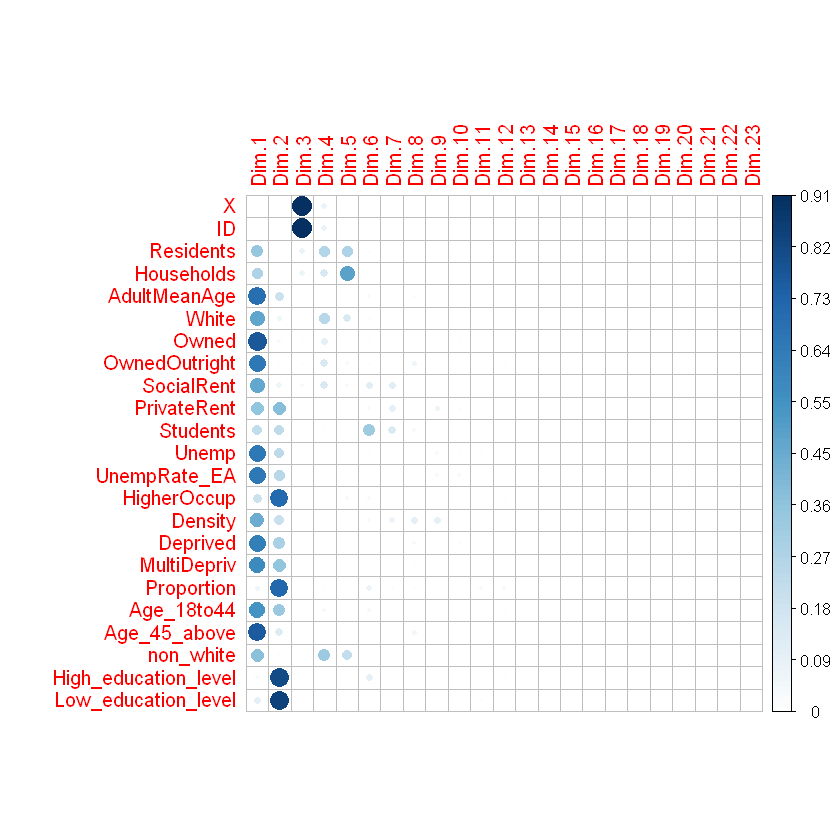

In [13]:
library("corrplot")
corrplot(pca_for_variables$cos2, is.corr = FALSE)

It looks like **AdultMeanAge**, **Owned**, **OwnedOutrght** etc all contribute to PC 1.

**High_education_level** and **Low_education_level** contributes to PC 2.

### Variable correlation plot
A variable correlation plots shows the relationships between all variables. It can be interpreted as follows;<br>

Positively correlated variables are grouped together.<br>
Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).<br>
The distance between variables and the origin measures the quality of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.

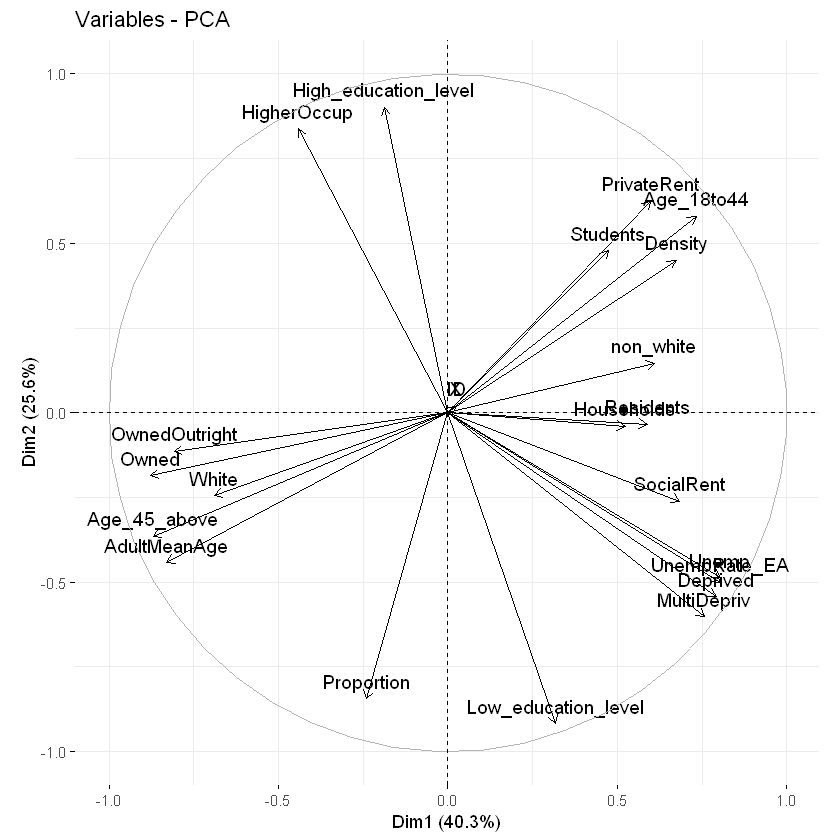

In [15]:
fviz_pca_var(pca, col.var = "black")

## Quality of representation of variables

The quality of representation of the variables on factor map is called cos2 (square cosine, squared coordinates). 

We can access to the cos2 as follows:

In [16]:
head(pca_for_variables$cos2, 10)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,...,Dim.14,Dim.15,Dim.16,Dim.17,Dim.18,Dim.19,Dim.20,Dim.21,Dim.22,Dim.23
X,0.0006280495,0.000403565,0.9085257819,0.075637696,0.011421593,0.003144595,0.0000811604,1.251092e-05,3.728439e-05,1.051185e-04,...,1.476825e-09,2.168694e-08,4.019205e-09,2.677256e-08,8.259950e-09,3.548540e-08,4.637367e-09,1.491162e-08,1.271687e-10,1.532622e-32
ID,0.0006280495,0.000403565,0.9085257819,0.075637696,0.011421593,0.003144595,0.0000811604,1.251092e-05,3.728439e-05,1.051185e-04,...,1.476825e-09,2.168694e-08,4.019205e-09,2.677256e-08,8.259950e-09,3.548540e-08,4.637367e-09,1.491162e-08,1.271687e-10,1.532622e-32
Residents,0.3452528858,0.001104756,0.0818273752,0.267820796,0.274185639,0.015294927,0.0020580708,1.873835e-03,2.702183e-03,5.591162e-05,...,7.751423e-05,1.646387e-03,8.946871e-06,9.343049e-04,3.188404e-05,3.124782e-03,4.691469e-05,3.607344e-05,1.924488e-08,2.131144e-63
Households,0.2742255708,0.001567777,0.0688217148,0.155928427,0.484533976,0.005359639,0.0002675404,5.780359e-05,2.427187e-05,2.629019e-03,...,4.549580e-04,1.116547e-03,4.848729e-06,8.016923e-04,3.572579e-05,2.836870e-03,4.350875e-05,3.134424e-05,3.896832e-08,3.543543e-63
AdultMeanAge,0.6883854235,0.195774777,0.0010971699,0.018083453,0.007041884,0.040420052,0.0006675665,2.683510e-02,1.441816e-03,8.748249e-03,...,4.844176e-04,6.572724e-04,1.747387e-04,3.820043e-04,3.576420e-04,2.748841e-05,3.054460e-03,4.149561e-04,1.785257e-08,4.265240e-64
White,0.4748858866,0.060106098,0.0041053472,0.249537883,0.151409438,0.023713483,0.0045968828,5.094418e-03,4.746454e-03,9.435168e-03,...,4.986753e-05,1.155216e-04,3.482804e-03,1.362776e-03,1.881254e-03,1.917459e-04,6.568559e-06,1.563907e-04,1.362794e-07,8.510561e-65
Owned,0.7679942444,0.034276952,0.0190075685,0.106567054,0.009919377,0.019166486,0.0056909758,3.281347e-03,5.599375e-03,2.049275e-02,...,2.303553e-03,3.945505e-04,1.717017e-05,2.799692e-05,7.667665e-05,2.663892e-08,1.438083e-07,7.863277e-06,3.674504e-04,2.665775e-65
OwnedOutright,0.6524886470,0.012698338,0.0179644265,0.152928823,0.030786208,0.015023707,0.0127314670,5.926293e-02,5.346689e-03,7.248414e-03,...,9.897937e-03,2.499533e-03,8.645947e-05,3.863880e-08,1.896002e-04,6.697039e-05,3.438444e-05,3.400837e-05,1.167255e-07,2.790301e-66
SocialRent,0.4689727774,0.068149710,0.0308605376,0.151774990,0.030855245,0.115594458,0.1135061092,5.100743e-04,1.097780e-02,2.927517e-03,...,2.997267e-03,1.312920e-04,6.440356e-05,3.545061e-07,1.945559e-05,1.415435e-06,8.370999e-06,3.495428e-06,2.183526e-04,4.464481e-65
PrivateRent,0.3575251268,0.390127446,0.0002017164,0.005480732,0.001638827,0.038384545,0.0940755366,1.804581e-02,6.428459e-02,2.506496e-02,...,1.162339e-04,5.321934e-05,3.882385e-06,4.350607e-06,3.238505e-05,3.162100e-06,3.465058e-06,4.806687e-06,1.415224e-04,2.988620e-65


We can show a bar plot of variables cos2 using the function `fviz_cos2()` from the in `factoextra` library.

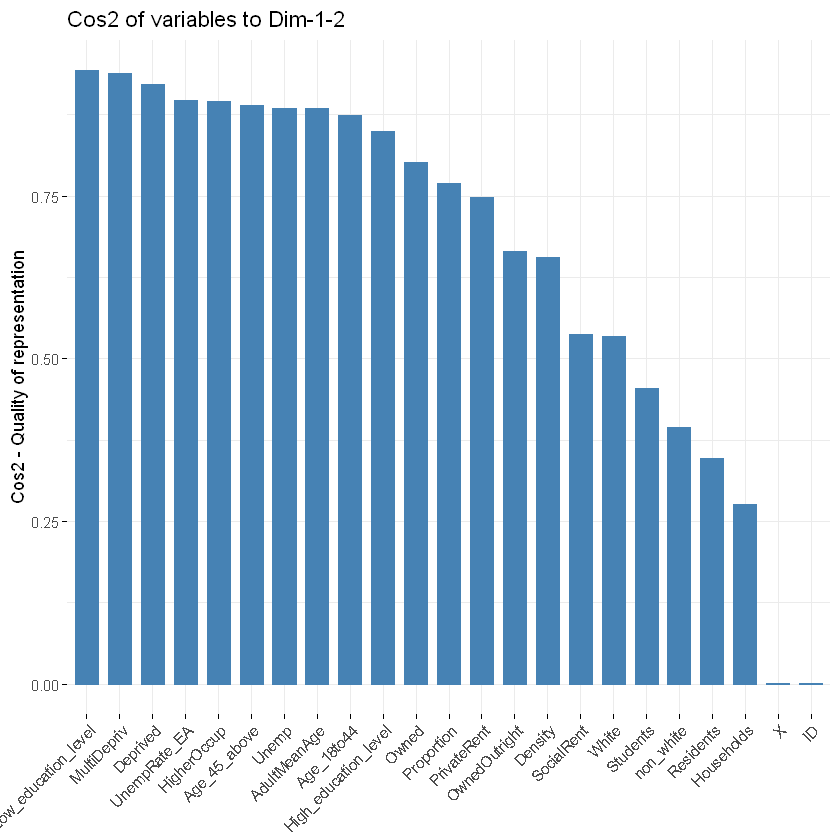

In [17]:
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(pca, choice = "var", axes = 1:2)

Note that a high cos2 indicates a good representation of the variable on the principal component. In this case the variable is positioned close to the circumference of the correlation circle eg **HigherOccup, Adult_mean_age, Age_45Above** (shown above).

A low cos2 indicates that the variable is not perfectly represented by the PCs. In this case the variable is shown close to the centre of the circle eg **ID**.

### Biplot representation

We will make a biplot, which includes both the position of each sample in terms of PC1 and PC2 and also will show you how the initial variables map onto this. 

Since these two principal components are formed as linear combinations of the original variables, we need some guidance when interpreting them. To make it easy, the arrows point towards the direction of that variable's association to the principal component axis. The further the arrow is from the centre, the stronger the effect on the principal components.

A biplot is a type of plot that will allow you to visualise how the samples relate to one another in our PCA (which samples are similar and which are different) and will simultaneously reveal how each variable contributes to each principal component.

It’s possible to colour variables by their cos2 values using the argument col.var = "cos2". 
This produces a gradient of colours. In this case, the argument `gradient.cols` can be used to provide a custom colour.<br>
  
variables with low cos2 values will be colored in red<br>
variables with mid cos2 values will be colored in blue<br>
variables with high cos2 values will be colored in green<br>

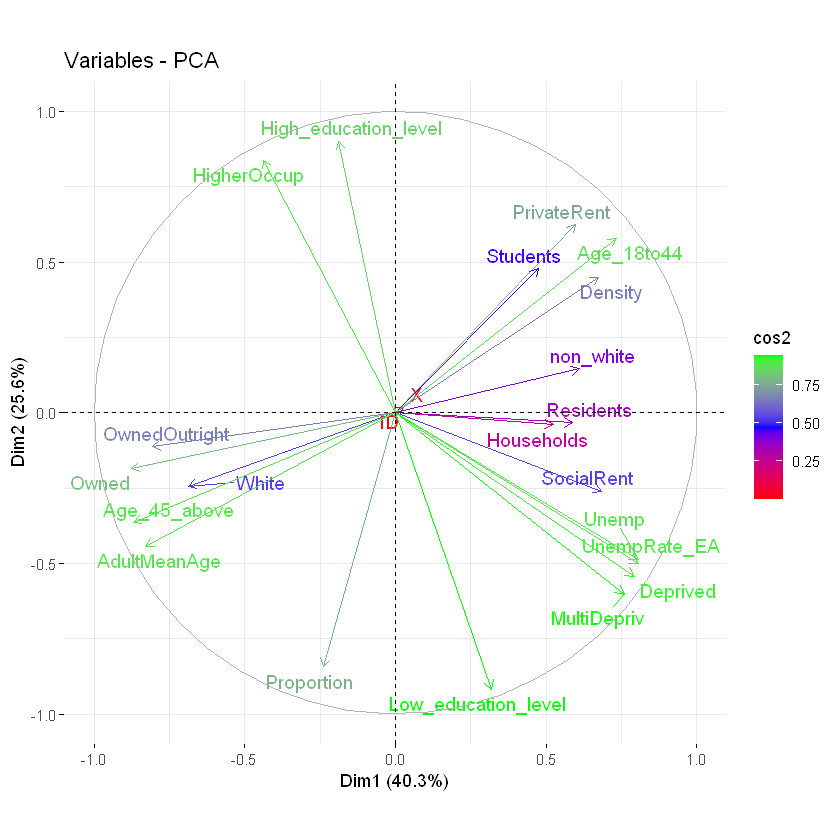

In [19]:
# Colour by cos2 values: quality on the factor map
fviz_pca_var(pca, col.var = "cos2",
               gradient.cols = c("red", "Blue", "Green"), 
               repel = TRUE) # Avoid text overlapping

### Contribution of variables to each PC

The larger the value of the contribution, the more the variable contributes to the component. Here I'm showing the first 20 variables and their level of contribution.

In [24]:
head(pca_for_variables$contrib, 20)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,...,Dim.14,Dim.15,Dim.16,Dim.17,Dim.18,Dim.19,Dim.20,Dim.21,Dim.22,Dim.23
X,0.006781525,0.006842494,4.418841e+01,4.505767758,8.711898e-01,0.337293338,0.01562045,0.003243921,0.012080668,0.04985083,...,3.742577e-06,8.182890e-05,2.145402e-05,2.033635e-04,7.942257e-05,3.774459e-04,7.050175e-05,2.995077e-04,1.744058e-05,5.000000e+01
ID,0.006781525,0.006842494,4.418841e+01,4.505767758,8.711898e-01,0.337293338,0.01562045,0.003243921,0.012080668,0.04985083,...,3.742577e-06,8.182890e-05,2.145402e-05,2.033635e-04,7.942257e-05,3.774459e-04,7.050175e-05,2.995077e-04,1.744058e-05,5.000000e+01
Residents,3.727956363,0.018731272,3.979878e+00,15.954191700,2.091370e+01,1.640553561,0.39610441,0.485861214,0.875545239,0.02651523,...,1.964370e-01,6.212128e+00,4.775730e-02,7.096951e+00,3.065772e-01,3.323722e+01,7.132425e-01,7.245539e-01,2.639343e-03,6.952607e-30
Households,2.961020758,0.026581852,3.347315e+00,9.288718591,3.695816e+01,0.574881789,0.05149188,0.014987725,0.007864428,1.24677193,...,1.152957e+00,4.212940e+00,2.588192e-02,6.089630e+00,3.435171e-01,3.017480e+01,6.614621e-01,6.295655e-01,5.344317e-03,1.156039e-29
AdultMeanAge,7.433017726,3.319385227,5.336359e-02,1.077238502,5.371245e-01,4.335506778,0.12848248,6.957993994,0.467168549,4.14872246,...,1.227614e+00,2.480012e+00,9.327340e-01,2.901693e+00,3.438864e+00,2.923847e-01,4.643686e+01,8.334611e+00,2.448393e-03,1.391484e-30
White,5.127701855,1.019106214,1.996738e-01,14.865071258,1.154886e+01,2.543538648,0.88473419,1.320916863,1.537917903,4.47448323,...,1.263746e-01,4.358849e-01,1.859078e+01,1.035161e+01,1.808898e+01,2.039534e+00,9.986160e-02,3.141188e+00,1.869006e-02,2.776471e-31
Owned,8.292614337,0.581169900,9.244804e-01,6.348241955,7.566072e-01,2.055821968,1.09530763,0.850810893,1.814276303,9.71837397,...,5.837677e+00,1.488713e+00,9.165227e-02,2.126638e-01,7.372752e-01,2.833489e-04,2.186313e-03,1.579380e-01,5.039405e+01,8.696777e-32
OwnedOutright,7.045413099,0.215301863,8.737446e-01,9.110031032,2.348239e+00,1.611462088,2.45034831,15.366111879,1.732402447,3.43744890,...,2.508341e+01,9.431207e+00,4.615100e-01,2.934991e-04,1.823078e+00,7.123408e-01,5.227456e-01,6.830759e-01,1.600833e-02,9.103028e-33
SocialRent,5.063853546,1.155486640,1.500979e+00,9.041296706,2.353505e+00,12.398810122,21.84583313,0.132255682,3.556962050,1.38833016,...,7.595689e+00,4.953894e-01,3.437783e-01,2.692817e-03,1.870729e-01,1.505549e-02,1.272640e-01,7.020749e-02,2.994600e+01,1.456485e-31
PrivateRent,3.860469026,6.614658423,9.810981e-03,0.326489405,1.250026e-01,4.117175624,18.10614855,4.679044494,20.829112330,11.88667388,...,2.945605e-01,2.008066e-01,2.072370e-02,3.304708e-02,3.113945e-01,3.363417e-02,5.267917e-02,9.654482e-02,1.940912e+01,9.750020e-32


The most important (or, contributing) variables can be highlighted on the correlation plot as follows using the same data shown above.

This is a graph of variables.

See http://www.sthda.com/english/wiki/fviz-pca-quick-principal-component-analysis-data-visualization-r-software-and-data-mining for further information.

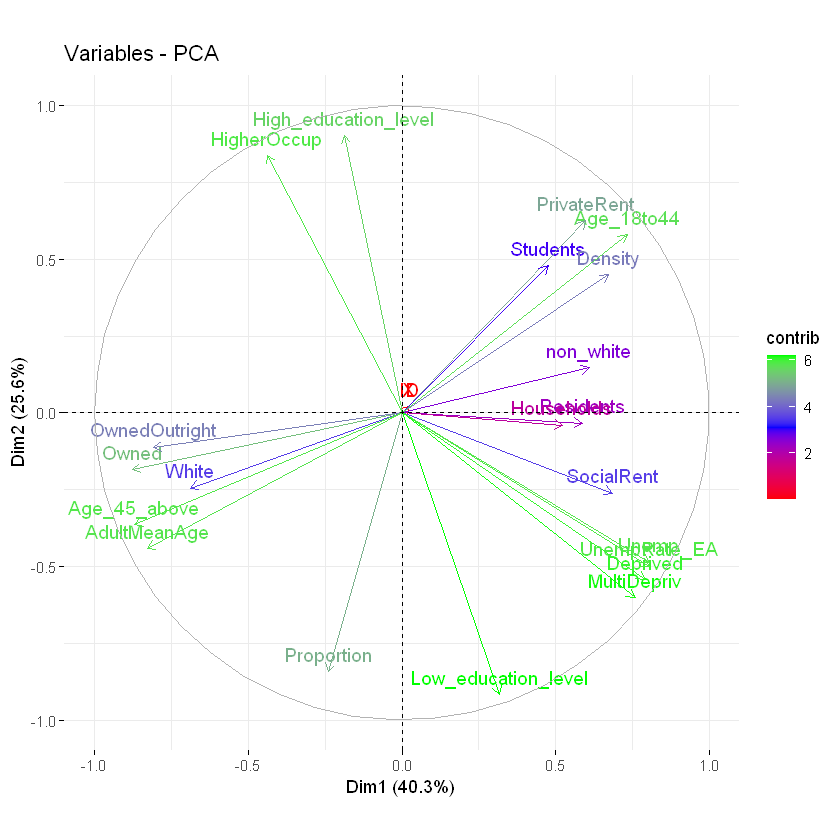

In [51]:
fviz_pca_var(pca, 
             axes = c(1, 2),
             col.var = "contrib",
             gradient.cols = c("red", "Blue", "Green"),
)

We can use the function `fviz_contrib(`) from the `factoextra` package to draw a bar plot of variable contributions. If your data contains many variables, you can decide to show only the top contributing variables. 

The red dashed line on the graphs indicate the expected average contribution. If the contribution of the variables were uniform, the expected value would be 

1/length(variables) = 1/23 = 4.3%. 

For a given component, a variable with a contribution larger than this cutoff could be considered as important in contributing to the component. 

This code shows the top 20 variables contributing to the principal components:

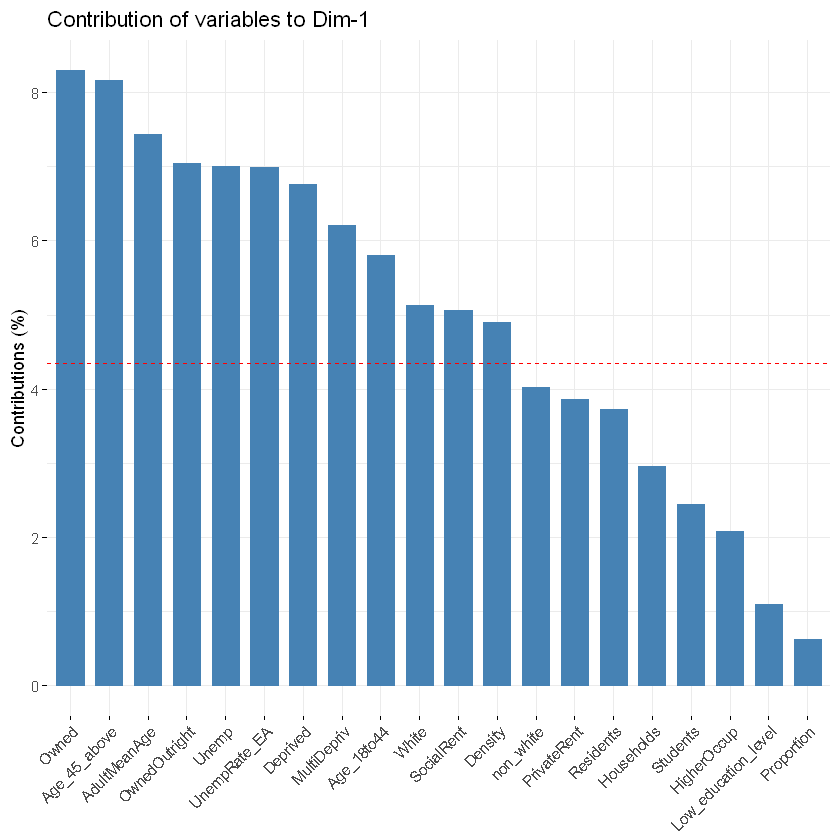

In [25]:
#install.packages("factoextra")
library(factoextra)
#?fviz_contrib
fviz_contrib(pca, choice = "var", axes = 1, top = 20)

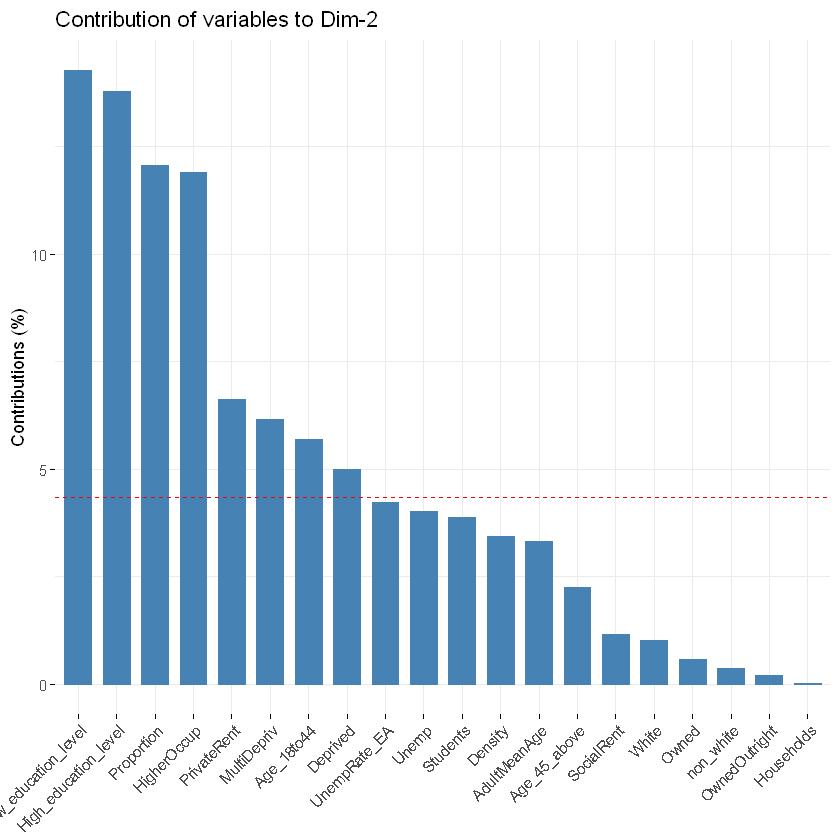

In [27]:
# Contributions of variables to PC2
fviz_contrib(pca, choice = "var", axes = 2, top = 20)

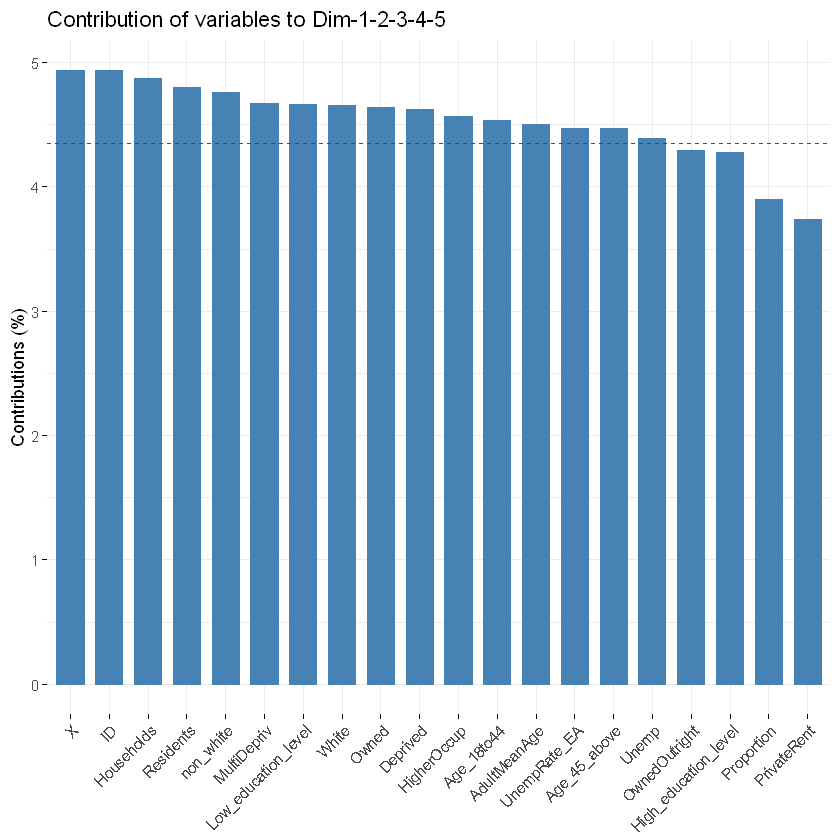

In [28]:
# Contribution to PC1 - PC5
fviz_contrib(pca, choice = "var", axes = 1:5, top = 20)

We can see that **Owned**, **Age_45_Above**, **OwnedOutright**, **Unemp**, **UnempRate_EA** contribute most to Dim1 - same as findings in cor_plot.

**Low_education_level**, **High_Education_Level**, **Proportion** and **HighOccup** contribute most to PC 2.

### Colour output by groups

We can colour individual elements by group. And we can add concentration ellipses and confidence ellipses by groups.

In the R code below: the argument `col.ind` is used to specify the **factor** variable for colouring individual records by groups.

To add a concentration ellipse around each group, specify the argument `addEllipses = TRUE`. The argument `palette` can be used to change group colours.

Change `axes` to show other PC's.

We can see that a lot of the **Leave** vote is represented by PC 2.

This is a graph of individuals - `fviz_pca_ind`.

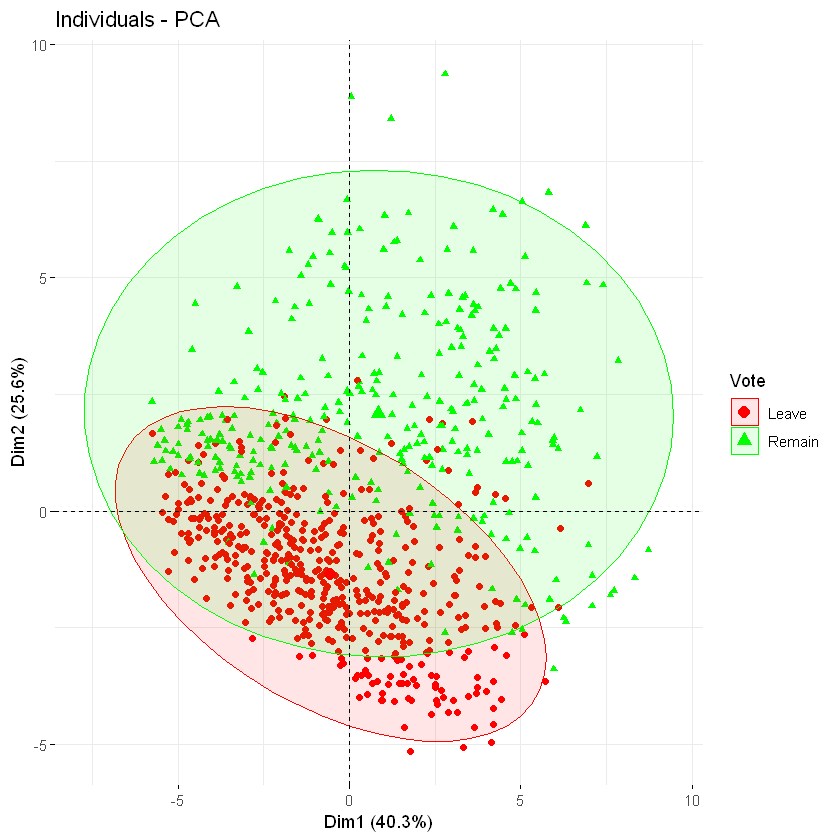

In [49]:
fviz_pca_ind(pca,
             axes = c(1, 2), col.var = "contrib",
             geom.ind = "point", # show points only (but not "text values")
             col.ind = data_file$Vote, # colour by groups
             palette = c("Red", "Green"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Vote"
)

We can create a biplot of individuals and variables to plot variables and the groups they belong to.

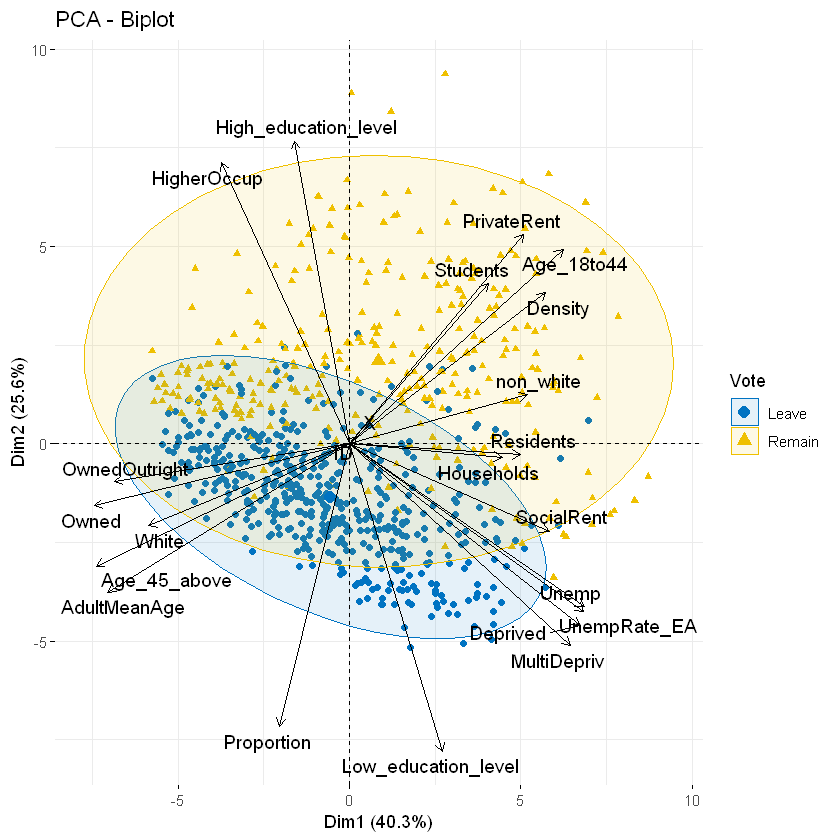

In [52]:
fviz_pca_biplot(pca, 
                col.ind = data_file$Vote, palette = "jco", 
                addEllipses = TRUE, label = "var",
                col.var = "black", repel = TRUE,
                legend.title = "Vote") 

### Graphical parameters

We can change the graphical parameters using the function `ggpar()` from the `ggpubr` package.

The graphical parameters that can be changed using `ggpar()` include:<br>

-Main titles, axis labels and legend titles<br>
-Legend position. Possible values: “top”, “bottom”, “left”, “right”, “none”.<br>
-Colour palette.<br>
-Themes. Allowed values include: theme_gray(), theme_bw(), theme_minimal(), theme_classic(), theme_void().<br>

See https://www.rdocumentation.org/packages/factoextra/versions/1.0.7/topics/fviz_pca 


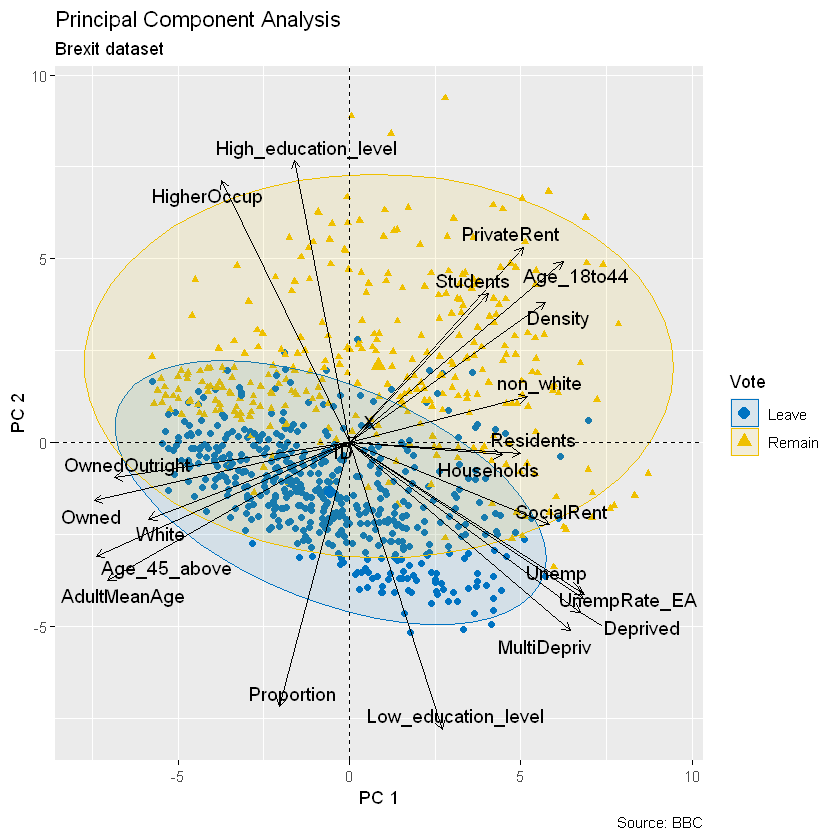

In [53]:
biplot <- fviz_pca_biplot(pca, 
                col.ind = data_file$Vote,
                addEllipses = TRUE, label = "var",
                col.var = "black", repel = TRUE
                ) 

ggpubr::ggpar(biplot,
              title = "Principal Component Analysis",
              subtitle = "Brexit dataset",
              caption = "Source: BBC",
              xlab = "PC 1", ylab = "PC 2",
              legend.title = "Vote", legend.position = "top",
              ggtheme = theme_gray(), palette = "jco")

And we can do this with other relevant charts.

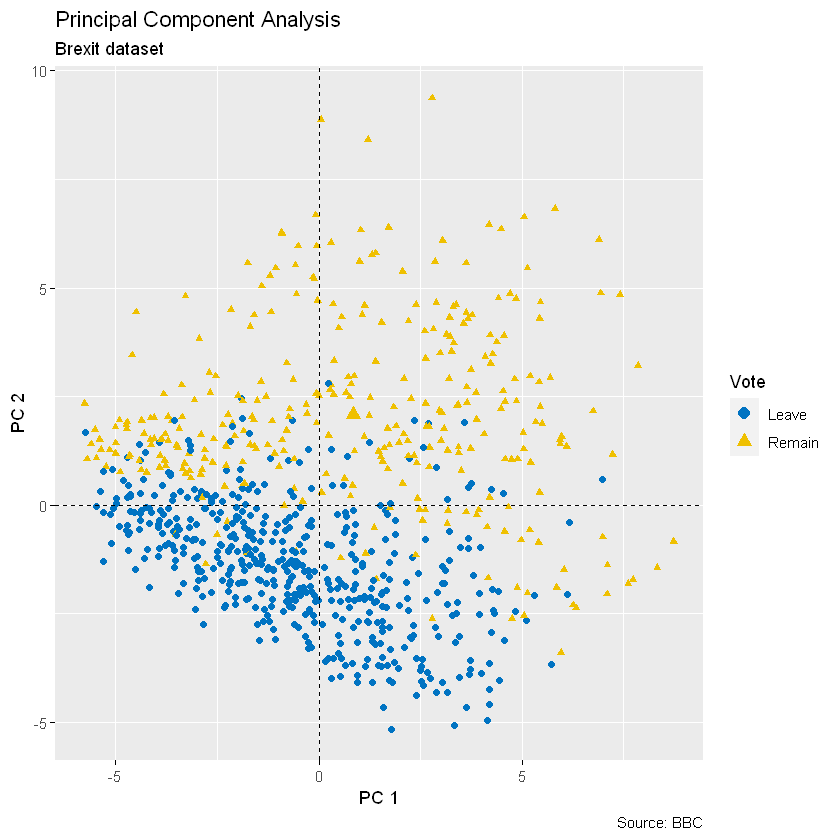

In [46]:
biplot <- fviz_pca_ind(pca, geom = "point", col.ind = data_file$Vote)
ggpubr::ggpar(biplot,
              title = "Principal Component Analysis",
              subtitle = "Brexit dataset",
              caption = "Source: BBC",
              xlab = "PC 1", ylab = "PC 2",
              legend.title = "Vote", legend.position = "top",
              ggtheme = theme_gray(), palette = "jco")


Lets see how PC 3 and PC 4 represent voters data.

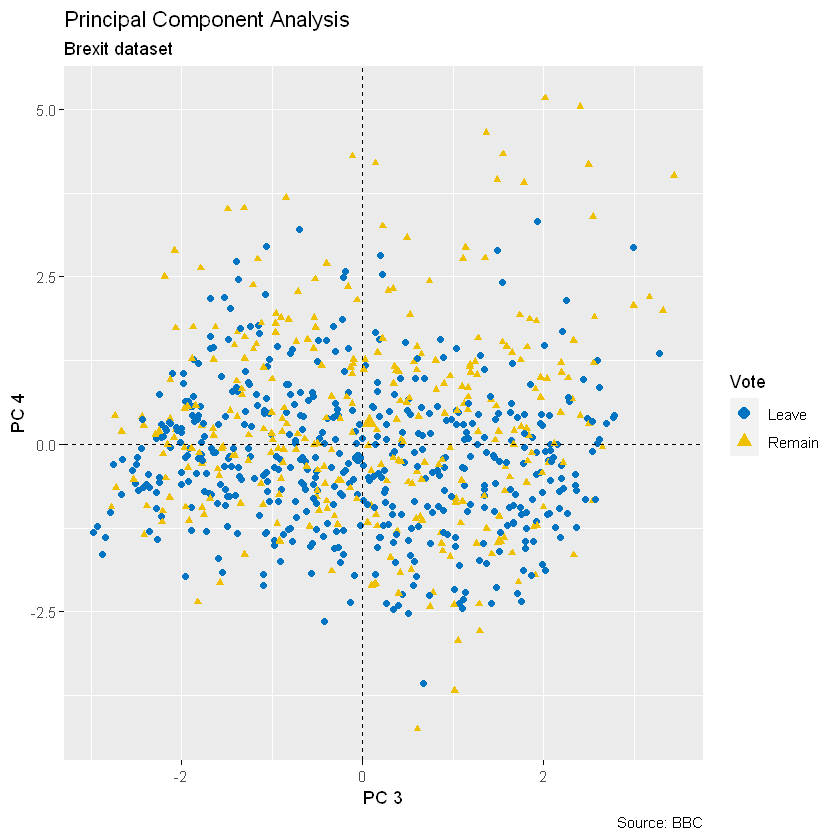

In [43]:
biplot <- fviz_pca_ind(pca, 
                       axes = c(3, 4),
                       geom = "point", 
                       col.ind = data_file$Vote)
ggpubr::ggpar(biplot,
              title = "Principal Component Analysis",
              subtitle = "Brexit dataset",
              caption = "Source: BBC",
              xlab = "PC 3", ylab = "PC 4",
              legend.title = "Vote", legend.position = "top",
              ggtheme = theme_gray(), palette = "jco")

From this investigation we've found other interesting relations. For example, other than the effects we have found so far (age, education, and ethnicity), people owning their own homes or not **PrivateRent** is also slightly associated with a higher tendency towards voting to leave the EU. 

A previously unknown relation is the fact that the more dense a ward's population is as shown by **Density** (think about highly populated cities), the more likely it is that they will vote to remain in the EU. 

**Household, residents, social rent** look to not contribute much to the dataset.